Phys474 - Spring 2022

Lab 3 - Monte carlo simulation of an Ideal Gas 

<font color='red'>Author: Owen Hallock

From the background material on Lab 3 from the lecture we know that for a  large number of particles of mass $m$ in a system at temperature $T$, the probability density function for the magnitude of velocity $v$ of those paticles is given by the Maxwell-Boltzmann distribution:

$\Large{f(v)dv=\left(\frac{m}{2\pi kT}\right)^{3/2} 4\pi v^2\, e^{-\frac{mv^2}{2kT}}\, dv}$

where $k$ is the Boltzmann constant $1.380649×10^{−23} J⋅K^{−1}$

We will use this velocity distribution for a system of $N$ particles at temeperature $T$ in a box of length $L$ on a side and volume $V=L^3$ to calculate the pressure $P$ in the box as a function of $N,L,T$

In the end we will aslo compare the relationship we get emperically from the monte varlo simulation to the Ideal Gas Law.

___________________________________________________________________
Part 1

Before we actually run the monte carlo simulation, let's first examine the distribution $f(v)$ 

In this part I want you plot the distribution function $f(v)$ as a function of the velocity $v$ for four different particle masses $m$ on a sinle figure with labels etc...

- Use the masses (to the nearest integer amu) for the four elements $^4He$, $^{20}Ne$, $^{40}Ar$, $^{132}Xe$ 
- Use temperature $T=300 K$ (approximately room temperature)

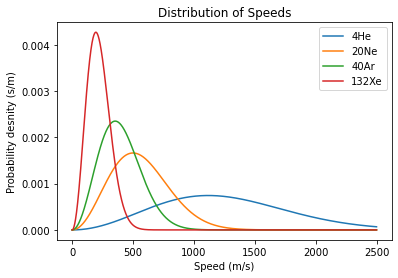

In [2]:
# Your code here...


from scipy import integrate
from scipy import sparse

import matplotlib.pyplot as plt
from matplotlib import animation

import numpy as np

from scipy.misc import derivative

T=300

k=1.380649E-23

def f1(v):
    m=4*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

def f2(v):
    m=20*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

def f3(v):
    m=40*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

def f4(v):
    m=132*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

v=np.arange(0,2500,1)

plt.plot(v,f1(v), label="4He")
plt.plot(v,f2(v), label="20Ne")
plt.plot(v,f3(v), label="40Ar")
plt.plot(v,f4(v), label="132Xe")
plt.title('Distribution of Speeds')
plt.ylabel('Probability desnity (s/m)')
plt.xlabel('Speed (m/s)')
plt.legend()
plt.show()

Observations

From this we can see that the particles with the higher atomic mass tend to have lower speeds. Comparing 132Xe and 4He we can see that Xenon would would almost be gaurenteed to have a velocity between 0 and 500 m/s, while Heliums distribution is more spread aout across all velocity, with the most likely velocity being close to 1000 m/s

Part 2a

Now using those same four masses generate 50,000 velocites at random from the distributions, and then histogram them (using histtype='step') on the same type of plot as above.

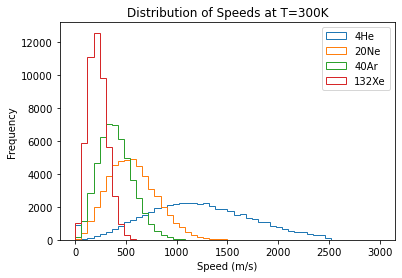

In [3]:
from scipy.integrate import quad

vN=50000
Bins=50


fInt1=np.asarray([quad(f1,0,v[i])[0] for i in range(v.size)])

Data_custum1 = np.asarray([v[np.argmax(fInt1 >= np.random.random())] for i in range(vN)])


fInt2=np.asarray([quad(f2,0,v[i])[0] for i in range(v.size)])

Data_custum2 = np.asarray([v[np.argmax(fInt2 >= np.random.random())] for i in range(vN)])


fInt3=np.asarray([quad(f3,0,v[i])[0] for i in range(v.size)])

Data_custum3 = np.asarray([v[np.argmax(fInt3 >= np.random.random())] for i in range(vN)])


fInt4=np.asarray([quad(f4,0,v[i])[0] for i in range(v.size)])

Data_custum4 = np.asarray([v[np.argmax(fInt4 >= np.random.random())] for i in range(vN)])


plt.hist(Data_custum1,Bins, histtype='step',range=(0,3000), label="4He")
plt.hist(Data_custum2,Bins, histtype='step',range=(0,3000), label="20Ne")
plt.hist(Data_custum3,Bins, histtype='step',range=(0,3000), label="40Ar")
plt.hist(Data_custum4,Bins, histtype='step',range=(0,3000), label="132Xe")
plt.title('Distribution of Speeds at T=300K')
plt.ylabel('Frequency')
plt.xlabel('Speed (m/s)')

plt.legend()
plt.show()

Part 2b

Now do the same set of MC but make a figure with 2 subplots
- Top: histrogram of $v^2$
- Bottom: histogram of $E=mv^2/2$

Also show on the bottom histogram a veritical line at $3kT/2$ and text with the mean kinteic energy from the genertaed events

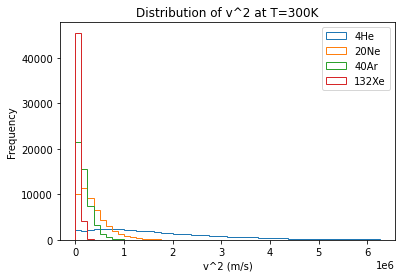

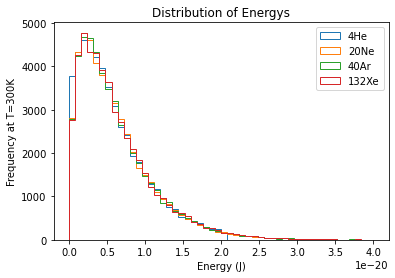

In [4]:
# Your code here...
v1=Data_custum1
v2=Data_custum2
v33=Data_custum3
v4=Data_custum4

v3=v33
plt.hist(v1**2,Bins, histtype='step',range=(0,2500**2),label="4He")
plt.hist(v2**2,Bins, histtype='step',range=(0,2500**2),label="20Ne")
plt.hist(v3**2,Bins, histtype='step',range=(0,2500**2),label="40Ar")
plt.hist(v4**2,Bins, histtype='step',range=(0,2500**2),label="132Xe")
plt.legend()
plt.title('Distribution of v^2 at T=300K')
plt.ylabel('Frequency')
plt.xlabel('v^2 (m/s)')
plt.legend()
plt.show()

m1=4*1.66E-27
m2=20*1.66E-27
m3=40*1.66E-27
m4=132*1.66E-27

plt.figure()

E1=(m1*v1**2)/2
E2=(m2*v2**2)/2
E3=(m3*v3**2)/2
E4=(m4*v4**2)/2

plt.hist(E1,Bins, histtype='step',range=(0,4*10**-20),label="4He")
plt.hist(E2,Bins, histtype='step',range=(0,4*10**-20),label="20Ne")
plt.hist(E3,Bins, histtype='step',range=(0,4*10**-20),label="40Ar")
plt.hist(E4,Bins, histtype='step',range=(0,4*10**-20),label="132Xe")
plt.title('Distribution of Energys')
plt.ylabel('Frequency at T=300K')
plt.xlabel('Energy (J)')
plt.legend()
plt.show()

Observations

From this plot we can see how the different gasses have roughly the same Energy values even though they have fastly different v^2 distributions, with the Helium being the most spread out and xenon having the largest spike. This distribution of v^2 is expected when looking at the histogram in part 2a. Also in part 2a we can see how the distrubution of speed histogram matches almost perfectly with the distribution graph in part 1


Part 3

Here will use the monet carlo technique to calculate the pressure $P$ in a box of
length $L$ on a side, $V=L^3$ by getting a random sampling of $N_{MC}$ particle velocities from the Maxwell-Boltzmann distribution for a mass $m$ and temperature $T$.

See the Lab 3 background slides from lecture on how to do the monte carlo

use the following:
- T = 300K
- m = 40 amu
- L = 0.5 m
- $N_{MC}$ = 1000

- show histograms for the distributions of velocity $v$ and x-velocity $v_x$ to examine the statistical flucuations of the distribution
- compare your result to the ideal gas law

you might also try varying the number $N_{MC}$ to see how well your MC answer compares to the ideal gas law $PV=NkT$

4.0978604004478205
6.845856023750538e-05
7
7.000000000000001e-05
0
100
200
300
400
500
600
700
800
900
3.3135576000000004e-17
3.2277032145464045e-17
Percent difference with N= 10000 =-2.591003260471339%


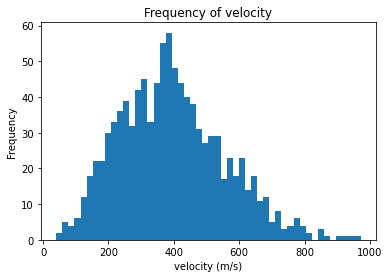

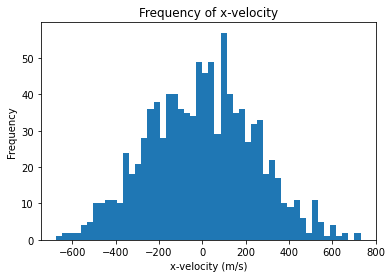

In [10]:
# Your code here...
N=1000
T=300
m=m3
L=.5
Bins=50

phi=2*np.pi*np.random.random(N)
v=np.empty(N)
cosT=-1 + 2* np.random.random(N)
sinT=np.sqrt(1-cosT**2)
for i in range(N):
    j=np.random.randint(0,4999)
    v[i]=v33[j]

vx=np.empty(N)
for i in range(N):
    vx[i]=v[i]*np.cos(phi[i])*sinT[i]
    
tMax=(2*L)/min(abs(vx))

xStart=np.empty((N,1))

for i in range(N):
    for j in range(1):
        xStart[i,j]=L*np.random.random(1)


print(tMax)


dt=.1*L/max(abs(vx))
print(dt)
dt=dt*10**5
dt=dt+.5
dt=round(dt)
print(dt)
dt=dt*10**-5
print(dt)

t=np.arange(0,tMax,dt)

deltaP=0
for j in range(N):
    if j % 100 ==0:
        print(j)
    for i in range(len(t)):
        
        xStart[j,0]=xStart[j,0]+vx[j]*dt
        
        if xStart[j,0]>=L:
            xStart[j,0]=xStart[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            deltaP=deltaP+2*m*abs(vx[j])
            
        if xStart[j,0]<=0:
            xStart[j,0]=xStart[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            




plt.hist(v,Bins)
plt.title('Frequency of velocity')
plt.ylabel('Frequency')
plt.xlabel('velocity (m/s)')
plt.figure()
plt.hist(vx,Bins)
plt.title('Frequency of x-velocity')
plt.ylabel('Frequency')
plt.xlabel('x-velocity (m/s)')

P=N*k*T/(L**3)
print(P)
print(deltaP/(tMax*L**2))

pCalc=deltaP/(tMax*L**2)

perDiff=(pCalc-P)/P

print('Percent difference with N= 10000 =' +str(perDiff*100) + '%')

Observations

From these two graphs we can see how the x-velocity is more centered around the origin as oppose to the standard velocity that is centered closer to 400 m/s. We can also see that both of these distrubtions are gaussian.

_________________________________________________________________
Part 4:

Note: for all the part 4's you will want to keep the values of pressure you get from
the MC for later plotting in part 5, without having to run them all again!

_________________________________________________________________________
Part 4a

here will examine the effect of pressure from varying the temperature

- use N=500, m=40amu, L=0.25m, T=[100,200,300,400] K
- plot the pressure from the MC vs T


[605. 605. 605. ... 605. 605. 605.] [605. 605. 605. ... 605. 605. 605.] [798. 605. 605. ... 605. 605. 605.] [605. 605. 605. ... 605. 605. 605.]
1.3216931631332098 1.3216931631332098 1.3216931631332098 1.0020355434781856
2.519999825234454e-16
4.267462350769249e-15
2.692115808940029e-16
2.8428901640969425e-16
2.0816665875682885e-17
3.5251723830875574e-16
2.223844411899292e-17
1.7804231191435426e-17


Text(0, 0.5, 'Pressure (Pa)')

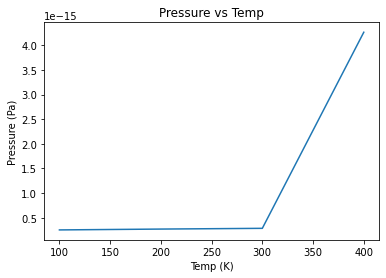

In [19]:
# Your code here...

N=500
m=m3
L=.25


def f100(v):
    T=100
    m=40*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

def f200(v):
    T=200
    m=40*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

def f300(v):
    T=300
    m=40*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

def f400(v):
    T=400
    m=40*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

fInt100=np.asarray([quad(f100,0,v[i])[0] for i in range(v.size)])

Data_custum100 = np.asarray([v[np.argmax(fInt100 >= np.random.random())] for i in range(vN)])


fInt200=np.asarray([quad(f200,0,v[i])[0] for i in range(v.size)])

Data_custum200 = np.asarray([v[np.argmax(fInt200 >= np.random.random())] for i in range(vN)])


fInt300=np.asarray([quad(f300,0,v[i])[0] for i in range(v.size)])

Data_custum300 = np.asarray([v[np.argmax(fInt300 >= np.random.random())] for i in range(vN)])


fInt400=np.asarray([quad(f400,0,v[i])[0] for i in range(v.size)])

Data_custum400 = np.asarray([v[np.argmax(fInt400 >= np.random.random())] for i in range(vN)])


v1=Data_custum100
v2=Data_custum200
v3=Data_custum300
v4=Data_custum400

print(v1,v2,v3,v4)


phi=2*np.pi*np.random.random(N)
v100=np.empty(N)
v200=np.empty(N)
v300=np.empty(N)
v400=np.empty(N)

cosT=-1 + 2* np.random.random(N)
sinT=np.sqrt(1-cosT**2)
for i in range(N):
    j=np.random.randint(0,4999)
    v100[i]=v1[j]
    v200[i]=v2[j]
    v300[i]=v3[j]
    v400[i]=v4[j]

vx100=np.empty(N)
vx200=np.empty(N)
vx300=np.empty(N)
vx400=np.empty(N)
for i in range(N):
    vx100[i]=v100[i]*np.cos(phi[i])*sinT[i]
    vx200[i]=v200[i]*np.cos(phi[i])*sinT[i]
    vx300[i]=v300[i]*np.cos(phi[i])*sinT[i]
    vx400[i]=v400[i]*np.cos(phi[i])*sinT[i]
    
tMax100=(2*L)/min(abs(vx100))
tMax200=(2*L)/min(abs(vx200))
tMax300=(2*L)/min(abs(vx300))
tMax400=(2*L)/min(abs(vx400))

xStart1=np.empty((N,1))
xStart2=np.empty((N,1))
xStart3=np.empty((N,1))
xStart4=np.empty((N,1))
for i in range(N):
    for j in range(1):
        xStart1[i,j]=L*np.random.random(1)
xStart1=xStart2
xStart1=xStart3
xStart1=xStart4
    
print(tMax100,tMax200,tMax300,tMax400)



dt1=.1*L/max(abs(vx100))

dt1=dt1*10**5
dt1=dt1+.5
dt1=round(dt1)
dt1=dt1*10**-5

dt2=.1*L/max(abs(vx200))

dt2=dt2*10**5
dt2=dt2+.5
dt2=round(dt2)
dt2=dt2*10**-5

dt3=.1*L/max(abs(vx300))

dt3=dt3*10**5
dt3=dt3+.5
dt3=round(dt3)
dt3=dt3*10**-5

dt4=.1*L/max(abs(vx400))

dt4=dt4*10**5
dt4=dt4+.5
dt4=round(dt4)
dt4=dt4*10**-5

t1=np.arange(0,tMax100,dt1)
t2=np.arange(0,tMax200,dt2)
t3=np.arange(0,tMax300,dt3)
t4=np.arange(0,tMax400,dt4)

deltaP1=0
deltaP2=0
deltaP3=0
deltaP4=0

for j in range(N):
    for i in range(len(t1)):
        xStart1[j,0]=xStart1[j,0]+vx100[j]*dt1
        
        if xStart1[j,0]>=L: 
            xStart1[j,0]=xStart1[j,0]-vx100[j]*dt1
            vx100[j]=-vx100[j]
            deltaP1=deltaP1+2*m*abs(vx100[j])
        if xStart1[j,0]<=0:
            xStart1[j,0]=xStart1[j,0]-vx100[j]*dt1
            vx100[j]=-vx100[j]
            
for j in range(N):
    for i in range(len(t2)):            
        xStart2[j,0]=xStart2[j,0]+vx200[j]*dt2 
        if xStart2[j,0]>=L:
            deltaP2=deltaP2+2*m*abs(vx200[j])
            xStart2[j,0]=xStart2[j,0]-vx200[j]*dt2
            vx200[j]=-vx200[j]
            
        if xStart2[j,0]<=0:
            xStart2[j,0]=xStart2[j,0]-vx200[j]*dt2
            vx200[j]=-vx200[j]
        

for j in range(N):
    for i in range(len(t3)):
        xStart3[j,0]=xStart3[j,0]+vx300[j]*dt3
        if xStart3[j,0]>=L:
            deltaP3=deltaP3+2*m*abs(vx300[j])
            xStart3[j,0]=xStart3[j,0]-vx300[j]*dt3
            vx300[j]=-vx300[j]
            
        if xStart3[j,0]<=0:
            xStart3[j,0]=xStart3[j,0]-vx300[j]*dt3
            vx300[j]=-vx300[j]
            
for j in range(N):
    for i in range(len(t4)):
        
        xStart4[j,0]=xStart4[j,0]+vx400[j]*dt4
        
        if xStart4[j,0]>=L:
            xStart4[j,0]=xStart4[j,0]-vx400[j]*dt4
            vx400[j]=-vx400[j]
            deltaP4=deltaP4+2*m*abs(vx400[j])
            
        if xStart4[j,0]<=0:
            xStart4[j,0]=xStart4[j,0]-vx400[j]*dt4
            vx400[j]=-vx400[j]
                
            

            
print(deltaP1/(tMax100*L**2))
print(deltaP2/(tMax200*L**2))
print(deltaP3/(tMax300*L**2))
print(deltaP4/(tMax400*L**2))
print(deltaP1)
print(deltaP2)
print(deltaP3)
print(deltaP4)
tMax100=tMax100
tMax200=tMax200
tMax300=tMax300
tMax400=tMax400

PMC=[deltaP1/(tMax100*L**2),deltaP2/(tMax200*L**2),deltaP3/(tMax300*L**2),deltaP4/(tMax400*L**2)]
PMC=np.sort(PMC)
T=[100,200,300,400]

plt.plot(T,PMC)
plt.title('Pressure vs Temp')
plt.xlabel('Temp (K)')
plt.ylabel('Pressure (Pa)')


Observations

What we expect to see here is a linear relationship as temperature increases so does the pressure. One unexpted aspect is the brak that happens in the trend, as we do expect it to be perfectly linear.

Part 4b

here will examine the effect of pressure from varying the Length (or Volume)

- use N=500, m=40amu, T=300K, L=[.1,.25,.5,1.] m
- plot the pressure from the MC vs V



0.03295410783651812 0.0823852695912953 0.1647705391825906 0.3295410783651812
1.7823312071859872e-05 4e-05 7.000000000000001e-05 0.00013000000000000002
4.156842311760461e-15
2.67385539347008e-16
3.3197737242130056e-17
4.163997583049173e-18


Text(0.5, 0, 'Volume (m^3)')

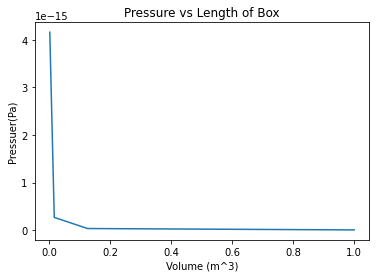

In [20]:
# Your code here...
N=500
T=300
m=m3
L1=.1
L2=.25
L3=.5
L4=1

Bins=50

phi=2*np.pi*np.random.random(N)
v=np.empty(N)
cosT=-1 + 2* np.random.random(N)
sinT=np.sqrt(1-cosT**2)
for i in range(N):
    j=np.random.randint(0,4999)
    v[i]=v3[j]

vx=np.empty(N)
for i in range(N):
    vx[i]=v[i]*np.cos(phi[i])*sinT[i]
    
tMax1=(2*L1)/min(abs(vx))
tMax2=(2*L2)/min(abs(vx))
tMax3=(2*L3)/min(abs(vx))
tMax4=(2*L4)/min(abs(vx))


xStart1=np.empty((N,1))
xStart2=np.empty((N,1))
xStart3=np.empty((N,1))
xStart4=np.empty((N,1))

for i in range(N):
    for j in range(1):
        xStart1[i,j]=L1*np.random.random(1)
        xStart2[i,j]=L2*np.random.random(1)
        xStart3[i,j]=L3*np.random.random(1)
        xStart4[i,j]=L4*np.random.random(1)




dt1=.1*L1/max(abs(vx))
dt1=dt1*10**5
dt1=dt1+.5
dt=round(dt1)
dt1=dt1*10**-5


dt2=.1*L2/max(abs(vx))
dt2=dt2*10**5
dt2=dt2+.5
dt2=round(dt2)
dt2=dt2*10**-5


dt3=.1*L3/max(abs(vx))
dt3=dt3*10**5
dt3=dt3+.5
dt3=round(dt3)
dt3=dt3*10**-5

dt4=.1*L4/max(abs(vx))
dt4=dt4*10**5
dt4=dt4+.5
dt4=round(dt4)
dt4=dt4*10**-5

t1=np.arange(0,tMax1,dt1)
t2=np.arange(0,tMax2,dt2)
t3=np.arange(0,tMax3,dt3)
t4=np.arange(0,tMax4,dt4)

deltaP1=0
deltaP2=0
deltaP3=0
deltaP4=0

print(tMax1,tMax2,tMax3,tMax4)
print(dt1,dt2,dt3,dt4)
for j in range(N):
    for i in range(len(t1)):
        xStart1[j,0]=xStart1[j,0]+vx[j]*dt1
        if xStart1[j,0]>=L1: 
            xStart1[j,0]=xStart1[j,0]-vx[j]*dt1
            vx[j]=-vx[j]
            deltaP1=deltaP1+2*m*abs(vx[j])
        if xStart1[j,0]<=0:
            xStart1[j,0]=xStart1[j,0]-vx[j]*dt1
            vx[j]=-vx[j]

                
            
for j in range(N):
    for i in range(len(t2)):            
        xStart2[j,0]=xStart2[j,0]+vx[j]*dt2
        if xStart2[j,0]>=L2:
            xStart2[j,0]=xStart2[j,0]-vx[j]*dt2
            vx[j]=-vx[j]
            deltaP2=deltaP2+2*m*abs(vx[j])
        if xStart2[j,0]<=0:
            xStart2[j,0]=xStart2[j,0]-vx[j]*dt2
            vx[j]=-vx[j]

for j in range(N):
    for i in range(len(t3)):
        xStart3[j,0]=xStart3[j,0]+vx[j]*dt3
        if xStart3[j,0]>=L3:
            xStart3[j,0]=xStart3[j,0]-vx[j]*dt3
            vx[j]=-vx[j]
            deltaP3=deltaP3+2*m*abs(vx[j])
        if xStart3[j,0]<=0:
            xStart3[j,0]=xStart3[j,0]-vx[j]*dt3
            vx[j]=-vx[j]
            
for j in range(N):
    for i in range(len(t4)):
        xStart4[j,0]=xStart4[j,0]+vx[j]*dt4
        if xStart4[j,0]>=L4: 
            xStart4[j,0]=xStart4[j,0]-vx[j]*dt4
            vx[j]=-vx[j]
            deltaP4=deltaP4+2*m*abs(vx[j])
        if xStart4[j,0]<=0:
            xStart4[j,0]=xStart4[j,0]-vx[j]*dt4
            vx[j]=-vx[j]





print(deltaP1/(tMax1*L1**2))
print(deltaP2/(tMax2*L2**2))
print(deltaP3/(tMax3*L3**2))
print(deltaP4/(tMax4*L4**2))

PMC2=[deltaP1/(tMax1*L1**2),deltaP2/(tMax2*L2**2),deltaP3/(tMax3*L3**2),deltaP4/(tMax4*L4**2)]
V=[.1**3,.25**3,.5**3,1**3]

plt.plot(V,PMC2)
plt.title('Pressure vs Length of Box')
plt.ylabel('Pressuer(Pa)')
plt.xlabel('Volume (m^3)')

Observations
This is what we expected to see due to the fact that pressure has a relationship of P~1/V


Part 4c

here we  will examine the effect of pressure from varying the number of particles

- use m=40amu, T=250K, L=.1 m, N=[300,500,750,1000]
- plot the pressure from the MC vs N




0.5862837839060394
1.2862706222298194e-05
2
2e-05


Text(0, 0.5, 'Pressure(Pa)')

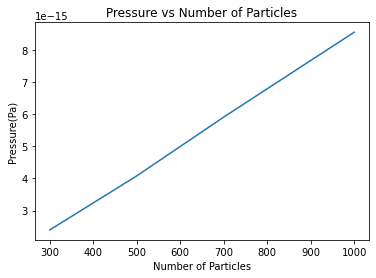

In [21]:
# Your code here...

# Your code here...
N=1000
N2=300
N3=500
N4=700


T=250

def f250(v):
    T=250
    m=40*1.66E-27
    A=(m/(2*np.pi*k*T))**(3/2)
    y=A*4*np.pi*v**2*np.exp(-(m*v**2)/(2*k*T))
    return y

fInt250=np.asarray([quad(f250,0,v[i])[0] for i in range(v.size)])

Data_custum250 = np.asarray([v[np.argmax(fInt250 >= np.random.random())] for i in range(vN)])

v1=Data_custum250

m=m3
L=.1
Bins=50

phi=2*np.pi*np.random.random(N)
v=np.empty(N)
cosT=-1 + 2* np.random.random(N)
sinT=np.sqrt(1-cosT**2)
for i in range(N):
    j=np.random.randint(0,4999)
    v[i]=v1[j]

vx=np.empty(N)
for i in range(N):
    vx[i]=v[i]*np.cos(phi[i])*sinT[i]
    
tMax=(2*L)/min(abs(vx))

xStart=np.empty((N,1))

for i in range(N):
    for j in range(1):
        xStart[i,j]=L*np.random.random(1)
xStart2=xStart
xStart3=xStart
xStart4=xStart


print(tMax)
tMax1=tMax


dt=.1*L/max(abs(vx))
print(dt)
dt=dt*10**5
dt=dt+.5
dt=round(dt)
print(dt)
dt=dt*10**-5
print(dt)

t=np.arange(0,tMax,dt)

deltaP1=0
deltaP2=0
deltaP3=0
deltaP4=0

for j in range(N):
    for i in range(len(t)):
        
        xStart[j,0]=xStart[j,0]+vx[j]*dt
        
        if xStart[j,0]>=L: 
            xStart[j,0]=xStart[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            deltaP1=deltaP1+2*m*abs(vx[j])
        if xStart[j,0]<=0:
            xStart[j,0]=xStart[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            


for j in range(N2):
    for i in range(len(t)):
        
        xStart2[j,0]=xStart2[j,0]+vx[j]*dt
        
        if xStart2[j,0]>=L:
            xStart2[j,0]=xStart2[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            deltaP2=deltaP2+2*m*abs(vx[j])
        if xStart2[j,0]<=0:
            xStart2[j,0]=xStart2[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            

for j in range(N3):
    for i in range(len(t)):
        
        xStart3[j,0]=xStart3[j,0]+vx[j]*dt
        
        if xStart3[j,0]>=L:
            xStart3[j,0]=xStart3[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            deltaP3=deltaP3+2*m*abs(vx[j])
        if xStart3[j,0]<=0:
            xStart3[j,0]=xStart3[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            

for j in range(N4):
    for i in range(len(t)):
        
        xStart4[j,0]=xStart4[j,0]+vx[j]*dt
        
        if xStart4[j,0]>=L: 
            xStart4[j,0]=xStart4[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            deltaP4=deltaP4+2*m*abs(vx[j])
            
        if xStart4[j,0]<=0:
            xStart4[j,0]=xStart4[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            




PMC3=[deltaP2/(tMax1*L**2),deltaP3/(tMax1*L**2),deltaP4/(tMax1*L**2),deltaP1/(tMax1*L**2)]

N=[300,500,700,1000]
plt.plot(N,PMC3)
plt.title('Pressure vs Number of Particles')
plt.xlabel('Number of Particles')
plt.ylabel('Pressure(Pa)')

Observations
This is a linear trend as we expected due to the relation ship of the pressure being P~N

_____________________________________________________
Part 5

Take all 12 points for the calculated pressure from MC from part 4 and plot
them vs $NT/V$ use errorbars of $\sigma = 1/\sqrt{N}$

Plot a line from the ideal gas law for $P=k NT/V$, that is a line of P vs NT/V with a slope of k = boltzmann constant





[2.51999983e-16 2.69211581e-16 2.84289016e-16 4.26746235e-15
 4.15684231e-15 2.67385539e-16 3.31977372e-17 4.16399758e-18
 2.39749441e-15 4.07976541e-15 5.91013182e-15 8.55130002e-15]
[3.20e+06 6.40e+06 9.60e+06 1.28e+07 1.50e+08 9.60e+06 1.20e+06 1.50e+05
 7.50e+07 1.25e+08 1.75e+08 2.50e+08]
Calculated k constant= 3.0307828794266097e-23
Percent Difference= 119.51871036205506%


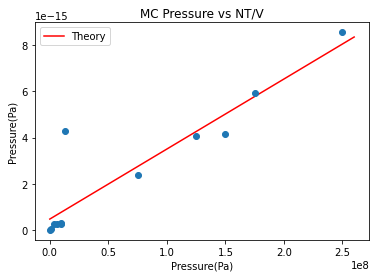

In [22]:

Ptot=np.concatenate([PMC,PMC2,PMC3])
print(Ptot)

NT1=[500*100/(.25**3),500*200/(.25**3),500*300/(.25**3),500*400/(.25**3)]
NT2=[500*300/(.1**3),500*300/(.25**3),500*300/(.5**3),500*300/1]
NT3=[300*250/(.1**3),500*250/(.1**3),700*250/(.1**3),1000*250/(.1**3)]

NTTheory=np.concatenate([NT1,NT2,NT3])

print(NTTheory)

N1=300
N2=500
N3=700
N4=1000


yerror=[PMC[0]/N2,PMC[1]/N2,PMC[2]/N2,PMC[3]/N2,PMC2[0]/N2,PMC2[1]/N2,PMC2[2]/N2,PMC2[3]/N2,PMC3[0]/N1,PMC3[1]/N2,PMC3[2]/N3,PMC3[3]/N4]

plt.errorbar(NTTheory,Ptot,yerr=yerror,fmt='o')



slope,intercept= np.polyfit((NTTheory),(Ptot),1)

x=np.linspace(0,2.6E8,10000)

y=slope*x+intercept

plt.plot(x,y,'-r',label='Theory')

print('Calculated k constant= ' + str(slope))
percentDiff=(slope-1.380649E-23)/(1.380649E-23)
print('Percent Difference= ' + str(percentDiff*100) +'%')
plt.title('MC Pressure vs NT/V')
plt.xlabel('Pressure(Pa)')
plt.ylabel('Pressure(Pa)')
plt.legend()
plt.show()

Observations
Using this slope we can find a calculated value of the k constant. Our k constant, however, was found to be 142% larger then the expected value.

___________________________________________________________
Part 6

Finally, I would like you to make a run similar to part 3 but with large statistics and compare to the prediction from the ideal gas law

Use:
- m = 40amu
- T = 300K
- L = 0.1 m
- N = 10,000
- make histograms of the velocities like part 3

2.7816672928216937
1.0207203836262025e-05
2
2e-05
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
4.141946999999999e-14
4.0721239969316485e-14


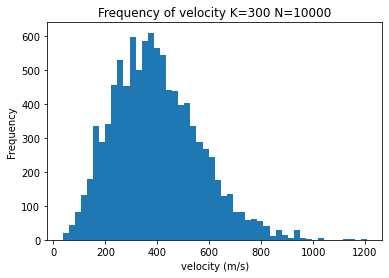

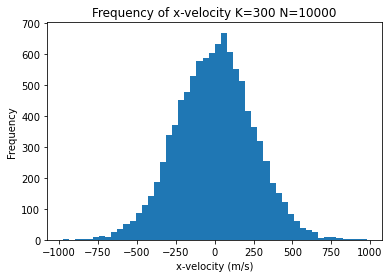

In [34]:
# Your code here...

# Your code here...
# Your code here...
N=10000
T=300
m=m3
L=.1
Bins=50

phi=2*np.pi*np.random.random(N)
v=np.empty(N)
cosT=-1 + 2* np.random.random(N)
sinT=np.sqrt(1-cosT**2)
for i in range(N):
    j=np.random.randint(0,4999)
    v[i]=v33[j]

vx=np.empty(N)
for i in range(N):
    vx[i]=v[i]*np.cos(phi[i])*sinT[i]
    
tMax=(2*L)/min(abs(vx))

xStart=np.empty((N,1))

for i in range(N):
    for j in range(1):
        xStart[i,j]=L*np.random.random(1)


print(tMax)


dt=.1*L/max(abs(vx))
print(dt)
dt=dt*10**5
dt=dt+.5
dt=round(dt)
print(dt)
dt=dt*10**-5
print(dt)
t=np.arange(0,tMax,dt)

deltaP=0

for j in range(N):
    if j % 500 ==0:
        print(j)
    for i in range(len(t)):
        
        xStart[j,0]=xStart[j,0]+vx[j]*dt
        
        if xStart[j,0]>=L:
            xStart[j,0]=xStart[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            deltaP=deltaP+2*m*abs(vx[j])
            
        if xStart[j,0]<=0:
            xStart[j,0]=xStart[j,0]-vx[j]*dt
            vx[j]=-vx[j]
            
plt.hist(v,Bins)
plt.title('Frequency of velocity K=300 N=10000')
plt.ylabel('Frequency')
plt.xlabel('velocity (m/s)')
plt.figure()
plt.hist(vx,Bins)
plt.title('Frequency of x-velocity K=300 N=10000')
plt.ylabel('Frequency')
plt.xlabel('x-velocity (m/s)')

P=N*k*T/(L**3)
print(P)
print(deltaP/(tMax*L**2))

__________________________________________________________________
Summary

In [35]:
pCalc=deltaP/(tMax*L**2)

perDiff=(pCalc-P)/P

print('Percent difference with N= 10000 =' +str(perDiff*100) + '%')

Percent difference with N= 10000 =-1.685753175218092%


In [ ]:
#This lab confirmed our expections of the change in pressure we would see when altering variables such as Temperature, Volume, and Number of Particles N.
#We saw same linear increases in pressure when increased the value of N and the Temperature.
#When we changed the length of the box L, we saw an incerse relationship due to the fact that pressure has a relationship of P~1/V.
#We also found that by taking the slope of the P vs NV/T graph you can get a rough estimate of the boltzmann constant. Our value for the bultzmann constant was 
#Finally when comparing the accuracy of our calculated pressure results we found that as the number of runs increased so did the precision of the final results.
#When N=10000 We got a percent error of 1.69% while for N=1000 we got a percent of error of 2.59%
